# Validation: Testing effect of combinations of CMs 
This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* Plots the combined effects of combinations of CMs

In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import types
import seaborn as sns
import scipy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor


%matplotlib inline

INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Healthcare specialisation                  0.000 ... 0.046 ... 1.000 ... [0. 1.]
 2 Mask wearing over 70%                      0.000 ... 0.050 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 1000                 0.000 ... 0.279 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.249 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 10                   0.000 ... 0.146 ... 1.000 ... [0. 1.]
 6 Business suspended - some                  0.000 ... 0.269 ... 1.000 ... [0. 1.]
 7 Business suspended - many                  0.000 ... 0.207 ... 1.000 ... [0. 1.]
 8 Schools and universities closed            0.000 ... 0.336 ... 1.

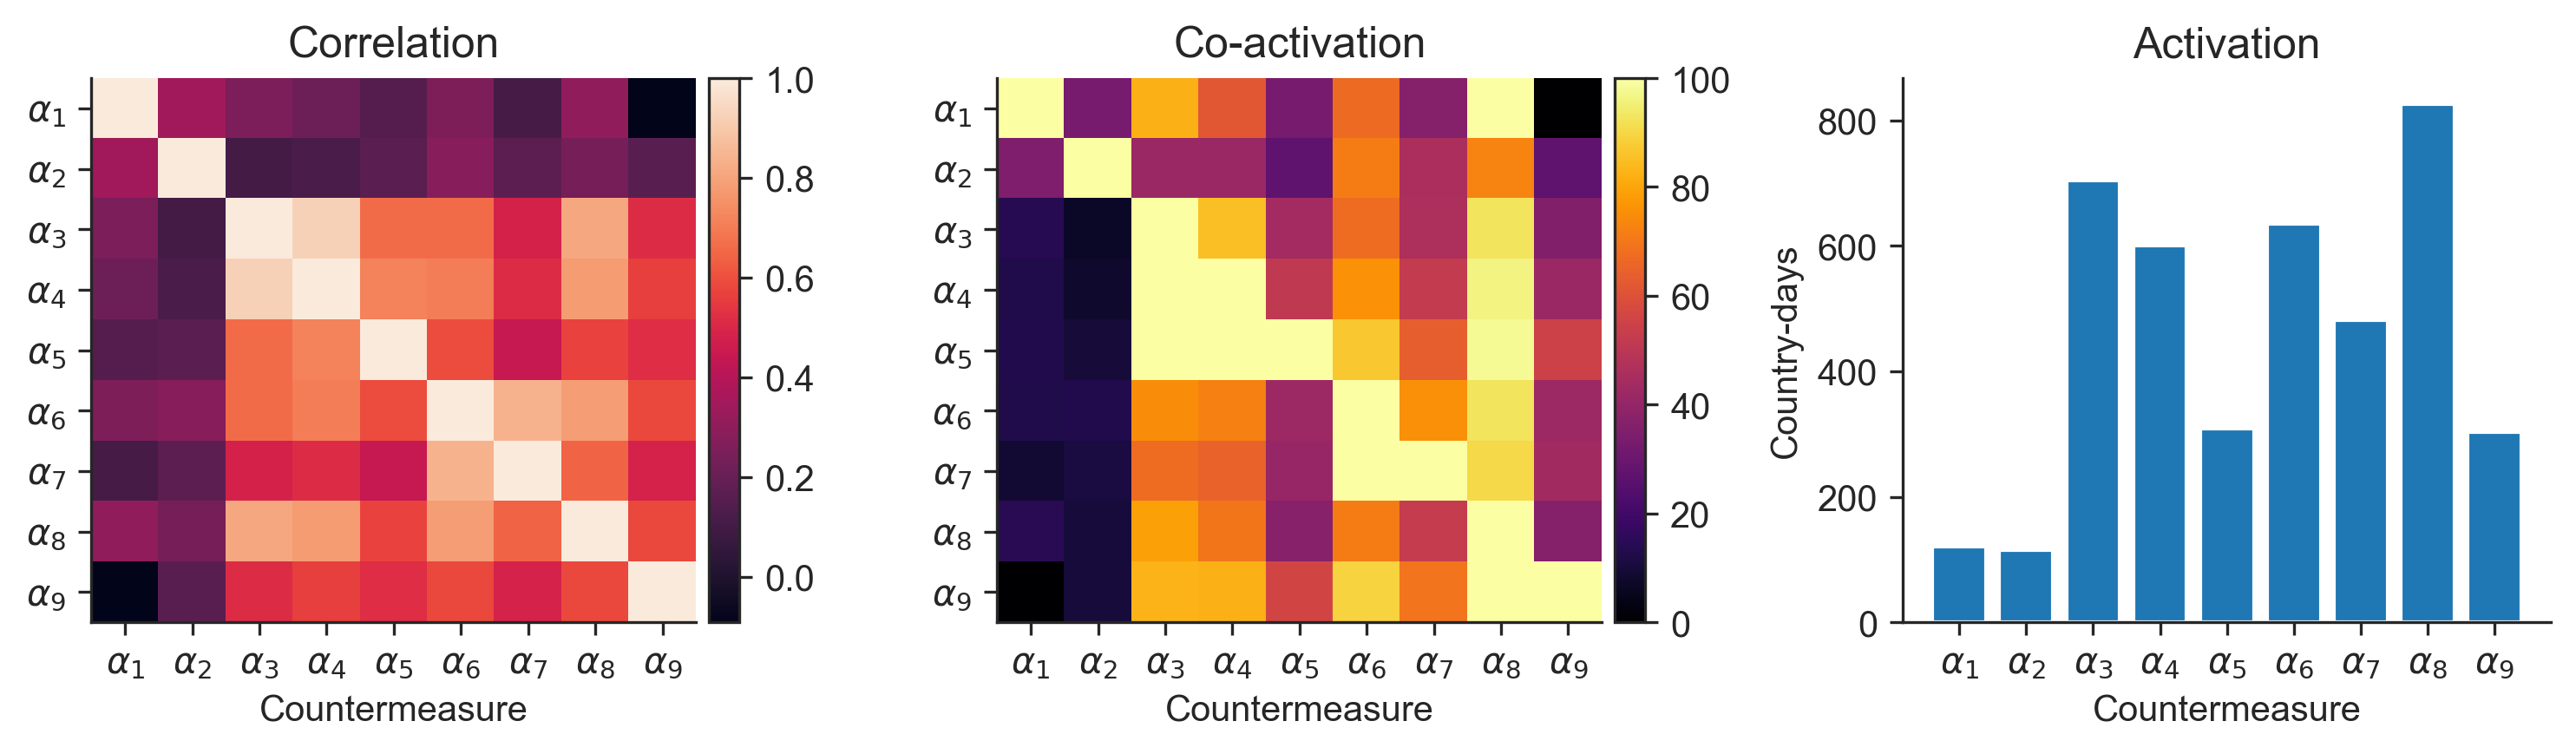

In [4]:
regions = ['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 
           'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'LT', 'MA', 'MX', 
           'MY', 'NL', 'PL', 'RO', 'RS', 'SE', 'SG', 'SI', 'SK', 'ZA']

features = ['Healthcare specialisation',
            'Mask wearing over 70%',
            'Gatherings limited to 1000',
            'Gatherings limited to 100',
            'Gatherings limited to 10',
            'Business suspended - some',
            'Business suspended - many',
            'Schools and universities closed',
            'General curfew']

dp = DataPreprocessor()
data = dp.preprocess_data("../../data", regions, features, 
                          selected_cm_set = "countermeasures-model-boolean_Gat3Bus2SchCurHespMa.csv")

##### Build model and run 

/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -12.77
RegionGrowthRate_log          9.41
RegionNoiseScale             68.53
Growth                     2556.98
InitialSize_log            -106.31
Observed_log_missing          0.00
Observed_log           -1854374.71
Name: Log-probability of test_point, dtype: float64

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha_log__              -12.77
RegionGrowthRate_log          9.41
RegionNoiseScale             68.53
Growth                     2556.98
InitialSize_log            -106.31
Observed_log_missing          0.00
Observed_log           -1854374.71
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:11<00:00, 11.59draws/s]
The number of effective samples is smaller than 10% for some parameters.
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arvi

/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/mat

/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/mat

/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/mat

/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/mat

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1520f5ac0>,
      dtype=object)

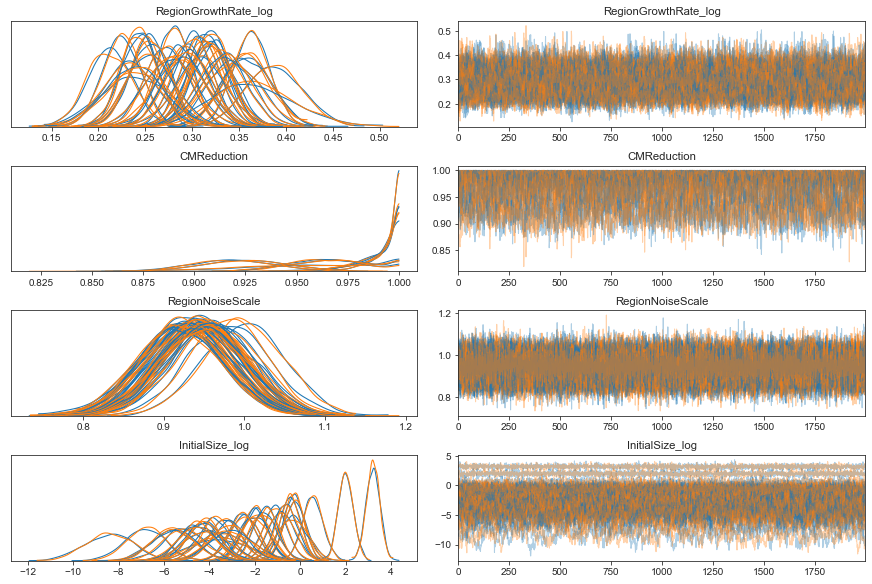

In [5]:
with cm_effect.models.CMModelFlexibleV3p1(data) as model:
    model.build_cm_reduction_exp_gamma_prior()
    model.build_region_growth_prior()
    model.build_region_reliability_prior()
    model.build_rates()
    model.build_output_model()
    log.info("Checking model test point")
    log.info(f"\n{model.check_test_point()}\n")
    
model.run(2000)
model.plot_traces()

#### Combined CM effects

Let's characterize the effect of multiple countermeasures at once. To do this we need to combine CMReduction (labeled Countermeasure Effectiveness in plots). We'll call the countermeasure reduction $R_{cm}$. Note that $R_{cm}$ is related to $\alpha$ by $R_{cm} = \exp(-\alpha_{cm})$

$R_{cm}$ is the percent reduction of the daily growth $g_t$. So after the application of the first countermeasure, we have:
$g_{t_1} = (1-R_{cm_1}) g_{t_0}$

Therefore, after the application of a second countermeasure, we have:
$g_{t_2} = (1-R_{cm_2}) R_{t_1} = (1-R_{cm_2})(1-R_{cm_1}) g_{t_0}$

The coefficient in front of $g_{t_0}$ is the total percentage of the original daily growth that defines the new daily growth. To get the pecent reduction, we must subtract this coefficient from 1. So the combined effective $R_{cm}$ is:

$R_{cm_{1,2}} = 1-(1-R_{cm_2})(1-R_{cm_1})$

And we can generalize this to $n$ combined countermeasures as:
$R_{cm_{1,2,...n}} = 1-(1-R_{cm_2})(1-R_{cm_1})...(1-R_{cm_n})$

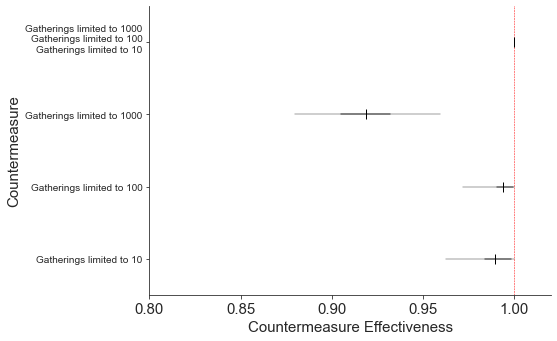

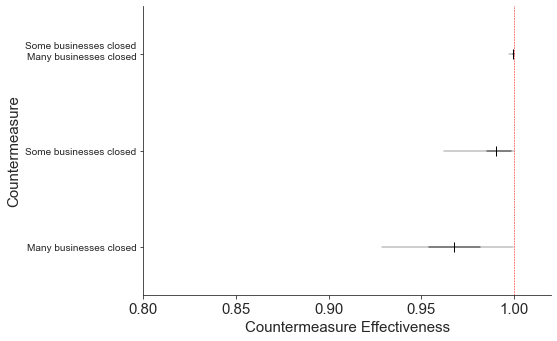

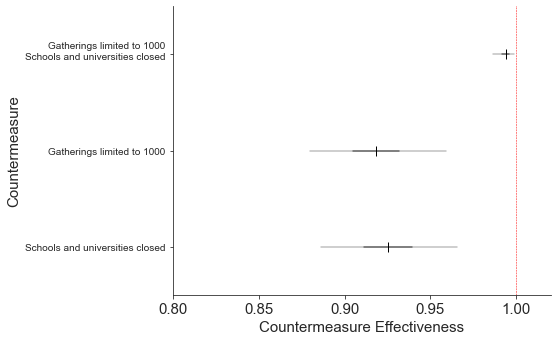

In [201]:
# dictionary for label names
feature_label_names = {'Healthcare specialisation': 'Healthcare specialisation',
                       'Mask wearing over 70%': 'Mask wearing over 70%',
                       'Gatherings limited to 1000': 'Gatherings limited to 1000',
                       'Gatherings limited to 100': 'Gatherings limited to 100',
                       'Gatherings limited to 10': 'Gatherings limited to 10',
                       'Business suspended - some': 'Some businesses closed',
                       'Business suspended - many': 'Many businesses closed',
                       'Schools and universities closed': 'Schools and universities closed',
                       'General curfew': 'General curfew'}

for i in range(len(feature_combos)):

    feature_list = feature_combos[i]
    n_tot = len(feature_list) + 1 # +1 because we plot the combined with each feature
    y_vals = -1 * np.arange(n_tot)
    
    # set up plot
    plt.figure(figsize=(8, 5))
    plt.plot([1, 1], [1, -(n_tot)], "--r", linewidth=0.5)
    
    # calculate confidence intervals of individual cms
    li = np.percentile(model.trace["CMReduction"], 2.5, axis=0)
    ui = np.percentile(model.trace["CMReduction"], 97.5, axis=0)
    lq = np.percentile(model.trace["CMReduction"], 25, axis=0)
    uq = np.percentile(model.trace["CMReduction"], 75, axis=0)
    
    # get means and confidence intervals for all the features
    labels = []
    means = []
    label_combo = ''
    mean_combo = 1
    li_combo = 1
    ui_combo = 1
    lq_combo = 1
    uq_combo = 1
    for j in range(len(feature_list)):
        feature = feature_list[j]
        ind = np.where(feature == np.array(features))[0][0]
        
        # means
        mean = np.mean(model.trace["CMReduction"], axis=0)[ind]
        means.append(mean)
        mean_combo = mean_combo*(1-np.mean(model.trace["CMReduction"], axis=0)[ind])
        
        # confidence intervals
        li_combo = li_combo*(1-li[ind])
        ui_combo = ui_combo*(1-ui[ind])
        lq_combo = lq_combo*(1-lq[ind])
        uq_combo = uq_combo*(1-uq[ind])
        
        # plot the single countermeasure confidence intervals
        plt.plot([li[ind], ui[ind]], [y_vals[j+1], y_vals[j+1]], color='k', alpha=0.25, solid_capstyle='round') # j+1 since plot combo first
        plt.plot([lq[ind], uq[ind]], [y_vals[j+1], y_vals[j+1]], color='k', alpha=0.5, solid_capstyle='round')
        
        # make labels
        label_combo+= feature_label_names[feature] + '\n'
        label = feature_label_names[feature]
        labels.append(label)
    labels = [label_combo] + labels
    mean_combo = 1-mean_combo
    li_combo = 1-li_combo
    ui_combo = 1-ui_combo
    lq_combo = 1-lq_combo
    uq_combo = 1-uq_combo
    
    # plot means 
    all_means = np.append(mean_combo, np.array(means))
    plt.plot(all_means, y_vals, marker="|", markersize=10, color='k', linewidth=0)
    
    # plot combo
    plt.plot([li_combo, ui_combo], [y_vals[0], y_vals[0]], color='k', alpha=0.25, solid_capstyle='round')
    plt.plot([lq_combo, uq_combo], [y_vals[0], y_vals[0]], color='k', alpha=0.5, solid_capstyle='round')
    plt.xlim([0.8, 1.02])
    plt.rc('font', size=15)
    plt.ylim([-(n_tot - 0.5), 0.5])
    plt.ylabel("Countermeasure", rotation=90)
    plt.yticks(y_vals, labels, fontsize=10)
    plt.xticks(np.arange(0.8,1.05, 0.05))
    plt.xlabel("Countermeasure Effectiveness")
    sns.despine()
    plt.tight_layout()
    plt.savefig('out/cm_combo_effects' + str(i) + '.pdf')